In [175]:
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler, MaxAbsScaler

In [176]:
# importing crop data of year 2020
# crop_data = pd.read_csv('./data/ndvi/crop_data_ndvi.csv')
# crop_data = pd.read_csv('../data/ndvi/crop_data_ndvi_march_bbox00004.csv')
crop_data = pd.read_csv('../data/ndvi/crop_data_ndvi_march_bbox5x5.csv')

In [177]:
# X = crop_data.drop(columns=['Class of Land', 'Latitude and Longitude', 'ndvi_mean', 'ndvi_max'])
X = crop_data.drop(columns=['Class of Land', 'Latitude and Longitude', 'ndvi_max'])
y = crop_data['Class of Land']

del crop_data

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)

In [179]:
X_train.head()

,vh,vv,RVI,ndvi_mean,ndvi_min
284,0.025757,0.118033,0.303256,0.358095,0.048155
423,0.003890,0.009123,0.653709,0.700000,0.700000
525,0.002746,0.013569,0.276259,0.700000,0.700000
519,0.008323,0.008974,1.335133,0.700000,0.700000
12,0.005207,0.054431,0.103184,0.223435,0.111036


In [180]:
sc = MaxAbsScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [181]:
model = SVC()

model.fit(X_train, y_train)

y_pred = model.predict(X_train)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

    Non Rice       0.85      0.98      0.91       245
        Rice       0.98      0.83      0.90       235

    accuracy                           0.91       480
   macro avg       0.92      0.90      0.91       480
weighted avg       0.92      0.91      0.91       480



In [182]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Non Rice       0.77      0.98      0.86        55
        Rice       0.98      0.75      0.85        65

    accuracy                           0.86       120
   macro avg       0.88      0.87      0.86       120
weighted avg       0.88      0.86      0.86       120



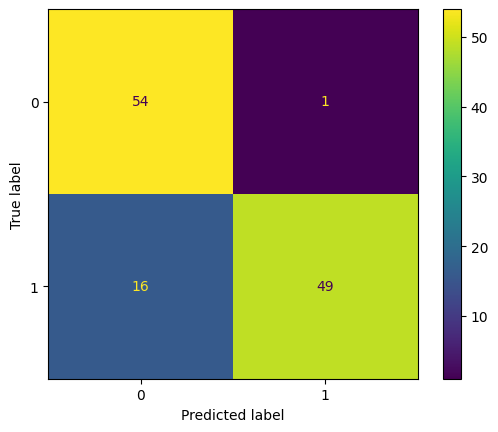

In [183]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [184]:
model = SVC()

params = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf'],
    'gamma': ['auto', 'scale']
}

grid = GridSearchCV(model, params, n_jobs=-1, verbose=1, cv=50)
grid.fit(X_train, y_train)

grid.best_score_, grid.best_params_

Fitting 50 folds for each of 20 candidates, totalling 1000 fits


(0.9126666666666668, {'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'})

In [185]:
model = grid.best_estimator_

model.fit(X_train, y_train)

SVC(C=1000)

In [186]:
y_pred = model.predict(X_train)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

    Non Rice       0.87      1.00      0.93       245
        Rice       0.99      0.84      0.91       235

    accuracy                           0.92       480
   macro avg       0.93      0.92      0.92       480
weighted avg       0.93      0.92      0.92       480



In [187]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Non Rice       0.79      0.98      0.88        55
        Rice       0.98      0.78      0.87        65

    accuracy                           0.88       120
   macro avg       0.89      0.88      0.87       120
weighted avg       0.90      0.88      0.87       120



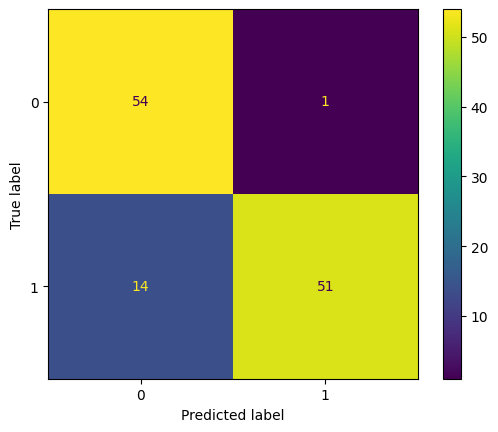

In [188]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

## On validation data

In [189]:
# X_val = pd.read_csv('./data/ndvi/validation_data_ndvi.csv')
X_val = pd.read_csv('../data/ndvi/validation_data_ndvi_march_bbox5x5.csv')
coords = X_val['Latitude and Longitude']
# X_val.drop(columns=['Latitude and Longitude', 'ndvi_mean', 'ndvi_max'], inplace=True)
X_val.drop(columns=['Latitude and Longitude', 'ndvi_max'], inplace=True)

In [190]:
X_val.head()

,vh,vv,RVI,ndvi_mean,ndvi_min
0,0.005058,0.383090,0.005950,0.070417,-0.001752
1,0.001983,0.081168,0.014730,0.170399,0.043861
2,0.017813,0.111093,0.205469,0.711041,0.684168
3,0.003966,0.006158,0.980703,0.700000,0.700000
4,0.020260,0.159520,0.151326,0.015140,-0.002439


In [191]:
X_val = sc.transform(X_val)

In [192]:
y_pred = model.predict(X_val)

In [193]:
submission_df = pd.DataFrame({'id':coords.values, 'target':y_pred})

submission_df.head()

,id,target
0,"(10.18019073690894, 105.32022315786804)",Rice
1,"(10.561107033461816, 105.12772097986661)",Rice
2,"(10.623790611954897, 105.13771401411867)",Non Rice
3,"(10.583364246115156, 105.23946127195805)",Non Rice
4,"(10.20744446668854, 105.26844107128906)",Rice


In [194]:
submission_df.where(submission_df['target'] == 'Non Rice').count()

id        173
target    173
dtype: int64

In [195]:
submission_df.where(submission_df['target'] == 'Rice').count()

id        77
target    77
dtype: int64

In [196]:
y_test.where(y_test == 'Rice').count(), y_test.where(y_test == 'Non Rice').count()

(65, 55)

In [197]:
y_train.where(y_train == 'Rice').count(), y_train.where(y_train == 'Non Rice').count()

(235, 245)

In [198]:
submission_df.to_csv("../data/submissions/challenge_1_submission_rice_crop_prediction_ndvi_march_bbox5x5_maxAbs.csv", index=False)

In [199]:
X_train.shape, X_test.shape, X_val.shape

((480, 5), (120, 5), (250, 5))